Explore Arabica coffee dataset from [coffee quality database](https://github.com/jldbc/coffee-quality-database/tree/master). This dataset contains reviews of 1312 arabica coffee beans from the Coffee Quality Institute's trained reviewers, and they were collected from the Coffee Quality Institute's review pages in January 2018.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
import numpy as np
np.bool = np.bool_
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
print(np.__version__)

1.23.5


In [4]:
df = pd.read_csv("~/Downloads/arabica_data_cleaned.csv") 

In [5]:
df.shape

(1311, 44)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [7]:
df.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [8]:
# check missing values
df.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [9]:
# Extract numerical columns
num_df = df.select_dtypes(include='number')

In [10]:
num_df.mean().to_frame().T

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,656.000763,153.887872,7.563806,7.51807,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379


In [11]:
num_df.min().to_frame().T

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [12]:
num_df.max().to_frame().T

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1312.0,1062.0,8.75,8.83,8.67,8.75,8.58,8.75,10.0,10.0,10.0,10.0,90.58,0.28,31.0,11.0,55.0,190164.0,190164.0,190164.0


I noticed that some column names containing dots, eg. Country.of.Origin and Number.ofBags

Row numbers are recorded in 'Unnamed: 0', we could drop this column.

Also there are quite some missing values in this dataset.

Average altitude is around 1800, but the maximum value is over 190000. We should take a closer look into altitude columns.

## Data Cleaning

In [13]:
# drop extra row number column
df = df.drop('Unnamed: 0', axis=1)

In [14]:
# change column names to lower case snake-case
df.columns = (df.columns
                .str.replace('.', '_')
                .str.lower()
             )

In [15]:
df[df['altitude_low_meters'] >5000]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
543,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,NaN,NaN,999,expocaccer,11000 metros,cerrado,GERSON NAIMEG,300,2 kg,Brazil Specialty Coffee Association,2014/2015,"August 15th, 2014",Expocaccer Coop dos Cafeic do Cerrado Ltda,Moka Peaberry,Semi-washed / Semi-pulped,7.08,7.50,7.50,7.83,7.75,7.67,10.00,10.00,10.00,7.58,82.92,0.11,0,0.0,Green,16,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0
896,Arabica,juan luis alvarado romero,Guatemala,la esperanza,11/23/0368,beneficio ixchel,11/23/0368,"unex guatemala, s.a.",190164,huehuetenango,"AGRICOLA EL PILAR, SA.",25,69 kg,Asociacion Nacional Del Café,2017,"June 1st, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.42,7.42,7.08,7.50,7.42,7.33,10.00,10.00,10.00,7.42,81.58,0.12,0,0.0,Green,0,"June 1st, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,190164.0,190164.0,190164.0
1040,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,cafetales santa matilde,NaN,beneficio san carlos,017/001/1066,"comercial internacional exportadora, s.a.",1100.00 mosl,jinotega,ROLANDO LACAYO,275,69 kg,Asociación de Cafés Especiales de Nicaragua,2015,"May 28th, 2015","COMERCIAL INTERNACIONAL EXPORTADORA, S.A.",Other,Washed / Wet,7.25,7.25,7.17,7.25,7.33,7.25,10.00,10.00,10.00,7.25,80.75,0.12,0,0.0,Green,5,"May 27th, 2016",Asociación de Cafés Especiales de Nicaragua,fc561dd3c2eee024b032933e0a97b4aede0dc206,f79a8d4dee92a80ff14025f03ea34fa316b2132f,m,110000.0,110000.0,110000.0
1144,Arabica,juan luis alvarado romero,Guatemala,la esperanza,11/23/0507,beneficio ixchel,11/23/0507,"unex guatemala, s.a.",1901.64,oriente,"AGRICOLA EL PILAR, S.A.",25,69 kg,Asociacion Nacional Del Café,2016,"June 22nd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.50,7.42,7.25,7.58,7.33,7.42,9.33,9.33,9.33,7.25,79.75,0.10,0,4.0,Green,1,"June 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,190164.0,190164.0,190164.0


According to [Inter American Coffee](https://www.interamericancoffee.com/brazil-cerrado/#:~:text=Brazil%20Cerrado%20coffee%20is%20grown,all%20levels%20of%20the%20production.),  Brazil Cerrado coffee is grown at altitudes of 900 to 1,250 meters above sea level.

According to [World Data Info](https://www.worlddata.info/america/nicaragua/index.php#:~:text=Nicaragua%20is%20comparatively%20low%20at,islands%20in%20the%20open%20sea.), the highest mountain peak at Nicaragua (Pico Mogotón) is at 2,107 meters.

According to [Brittanica](https://www.britannica.com/place/Huehuetenango), the highest mountain peak at Huehuetenango is at 1,890 meters.

According to [Coffee Hero](https://coffeehero.com.au/blogs/news/guatemalan-coffee-beans-everything-you-need-to-know#:~:text=Nuevo%20Oriente%20coffee%20grows%20at,5500%20feet%20above%20sea%20level.&text=The%20Atitlan%20growing%20region%20surrounds,50%20mm%20rain%20every%20month.), Nuevo Oriente coffee grows at high elevations of about 4,300 feet to 5,500 feet above sea level (1,310 to 1,680 meters).

Looking at altitude column, likely those observations were parsed incorrectly.

In [16]:
df.at[543, 'altitude_low_meters'] = 1100
df.at[543,'altitude_mean_meters'] = 1100
df.at[543, 'altitude_high_meters'] = 1100

df.at[896, 'altitude_low_meters'] = 1902
df.at[896,'altitude_mean_meters'] = 1902
df.at[896, 'altitude_high_meters'] = 1902

df.at[1040, 'altitude_low_meters'] = 1100
df.at[1040,'altitude_mean_meters'] = 1100
df.at[1040, 'altitude_high_meters'] = 1100

df.at[1144, 'altitude_low_meters'] = 1902
df.at[1144,'altitude_mean_meters'] = 1902
df.at[1144, 'altitude_high_meters'] = 1902

### Numerical variables

Text(0.5, 1.0, 'Total Cup Points')

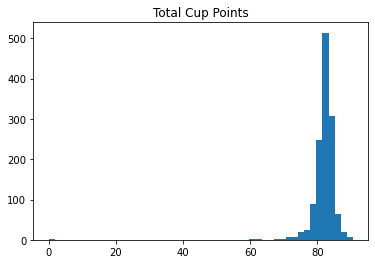

In [17]:
plt.hist(df.total_cup_points, bins = 50)
plt.title('Total Cup Points')

In [18]:
df.total_cup_points.describe()

count    1311.000000
mean       82.115927
std         3.515761
min         0.000000
25%        81.170000
50%        82.500000
75%        83.670000
max        90.580000
Name: total_cup_points, dtype: float64

The total cup point is normally distributed (bell shaped) with most of the beans are scored between 70 to 90, and an average score of 82


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5708dad00>,
      dtype=object)

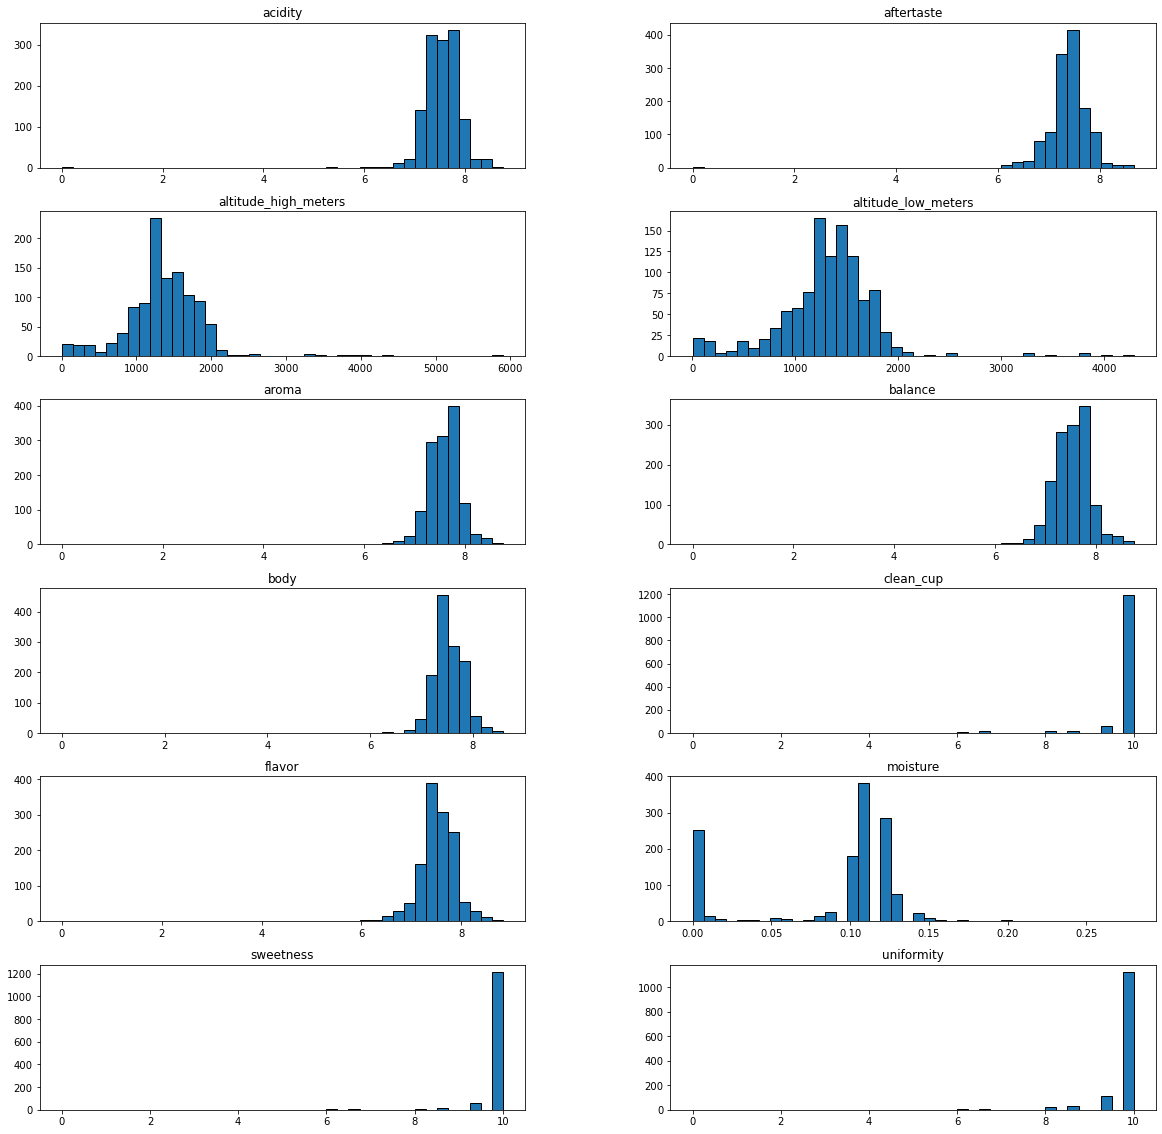

In [19]:
# Plot rest of numerical variables

fig, axis = plt.subplots(6, 2, figsize=(20,20))
df[['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness','moisture','altitude_low_meters','altitude_high_meters']].hist(ax=axis, edgecolor='black', grid=False, bins = 40)

Acidity, aroma, body, flavor, aftertaste and balance follow normal distributions.

Altitudes roughly follow normal distributions, but they have long right tails.

Clean-cup, sweetness and uniformity are left skewed.

Moisture follows zero-inflated normal distribution. It's likely that the method to measure moisture was not as refined, which resulted in recording many observations as zero.


In [20]:
corr = df[['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness','moisture']].corr()
corr

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture
aroma,1.000000,0.814304,0.777373,0.724834,0.696161,0.716963,0.365820,0.334816,0.327503,-0.132734
flavor,0.814304,1.000000,0.895253,0.816705,0.761683,0.802548,0.408781,0.395862,0.361538,-0.145263
aftertaste,0.777373,0.895253,1.000000,0.792382,0.760700,0.823344,0.399422,0.385777,0.342819,-0.178816
acidity,0.724834,0.816705,0.792382,1.000000,0.732584,0.742307,0.373236,0.299461,0.330911,-0.126572
body,0.696161,0.761683,0.760700,0.732584,1.000000,0.767547,0.338724,0.286748,0.326758,-0.173301
balance,0.716963,0.802548,0.823344,0.742307,0.767547,1.000000,0.404540,0.374242,0.342861,-0.211059
uniformity,0.365820,0.408781,0.399422,0.373236,0.338724,0.404540,1.000000,0.525415,0.537956,0.014526
clean_cup,0.334816,0.395862,0.385777,0.299461,0.286748,0.374242,0.525415,1.000000,0.525851,-0.013631
sweetness,0.327503,0.361538,0.342819,0.330911,0.326758,0.342861,0.537956,0.525851,1.000000,0.046361
moisture,-0.132734,-0.145263,-0.178816,-0.126572,-0.173301,-0.211059,0.014526,-0.013631,0.046361,1.000000


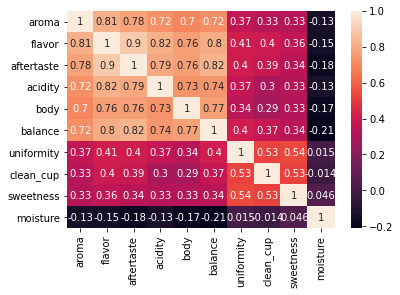

In [21]:
sns.heatmap(corr, annot=True)
plt.show()

There are 2 groups of correlated variables:

(1) Aroma, flavor, aftertaste, acidity, body and balance are strongly correlated (0.7 or above)

(2) Uniformity, clean cup, sweetness are correlated (~0.5)

Note that:

(i) Group 1 and group 2 variables are weakly positively correlated (~0.35)

(ii) Moisture has weak correlations with group 1 and group 2 variables


### Categorical variables

In [24]:
df.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

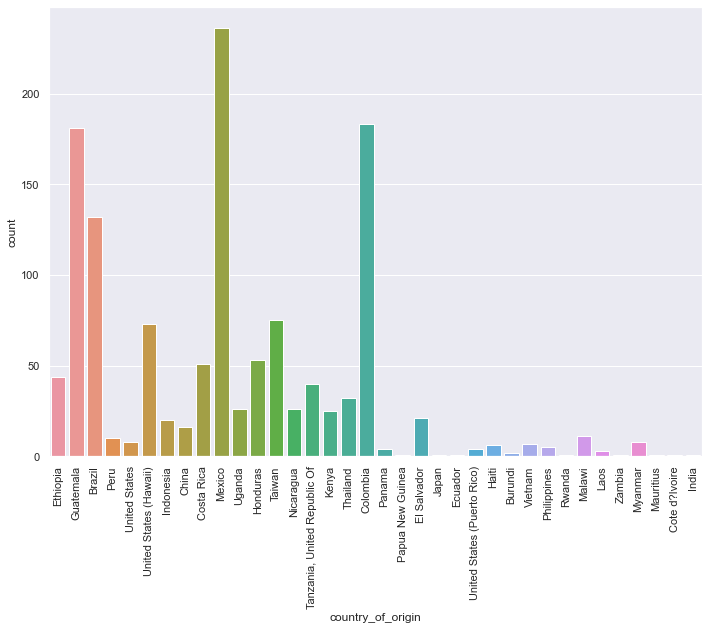

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = df, x = 'country_of_origin').tick_params(axis='x', rotation=90)

Majority of the coffee beans from the dataset were from Mexico, Guatemala and Colombia.

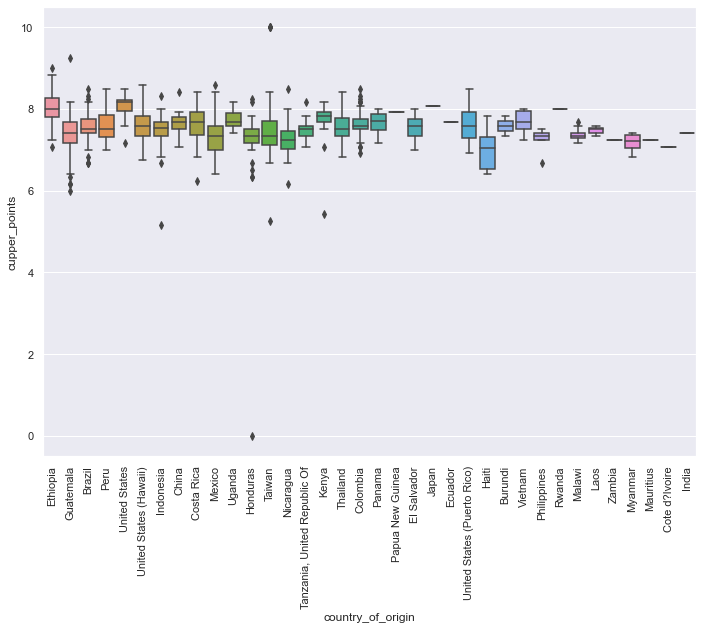

In [26]:
sns.boxplot(x="country_of_origin", y="cupper_points", data=df).tick_params(axis='x', rotation=90)

Coffee beans from Ethiopia and United States have higher cupping points than coffee beans from other origins. From my personal experience, Ethiopia coffee beans usually have stronger and distinct aroma, eg. Yirgacheffe and Worka Sakaro.

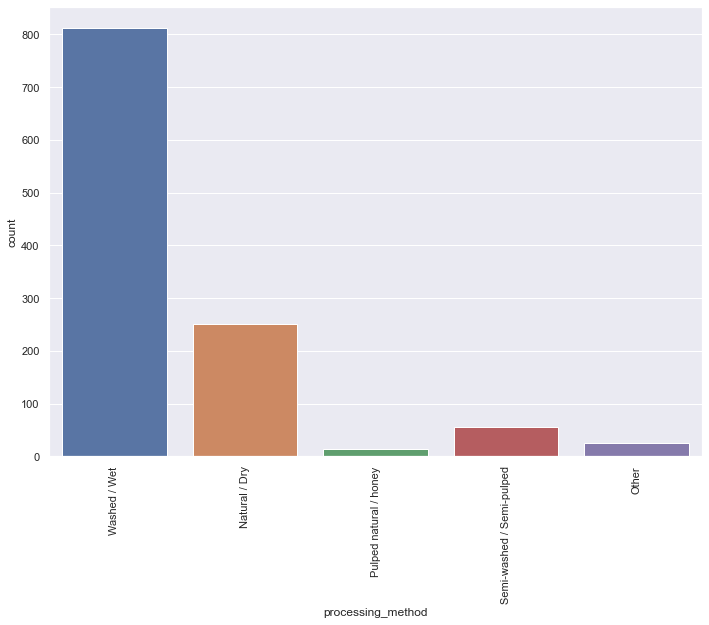

In [27]:
sns.countplot(data = df, x = 'processing_method').tick_params(axis='x', rotation=90)

Majority of the coffee beans from the dataset were washed/wet processed.

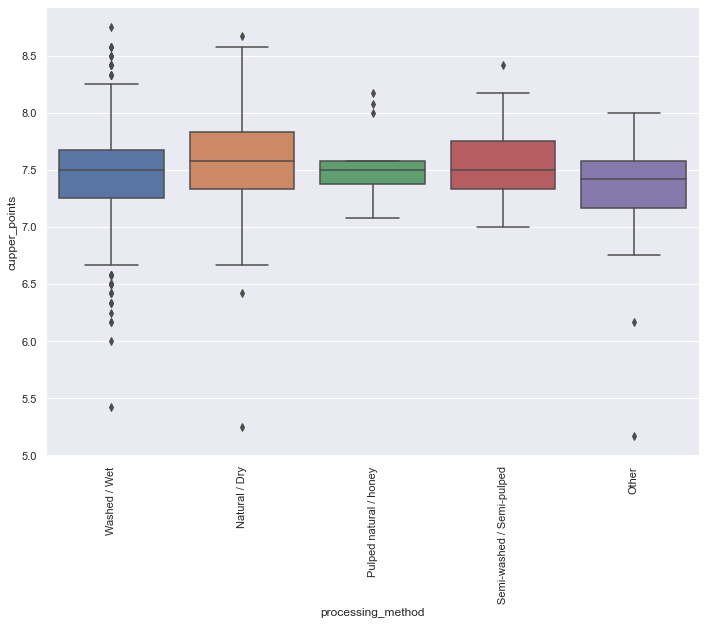

In [28]:
sns.boxplot(x="processing_method", y="cupper_points", data=df).tick_params(axis='x', rotation=90)

Washed/wet and Natural/dry proccessed beans have larger variations in cupping scores than other methods because this dataset contains more observations from those two processing methods.

### Characteristics, origins and processing methods
1. Do coffee beans share similar characteristics(aroma, flavor, aftertaste, acidity, body, balance, uniformity, clean cup and sweetness) if they were processed the same way?

2. Do coffee beans from the same origins have similar characteristics?

#### Processing methods

##### Wet process

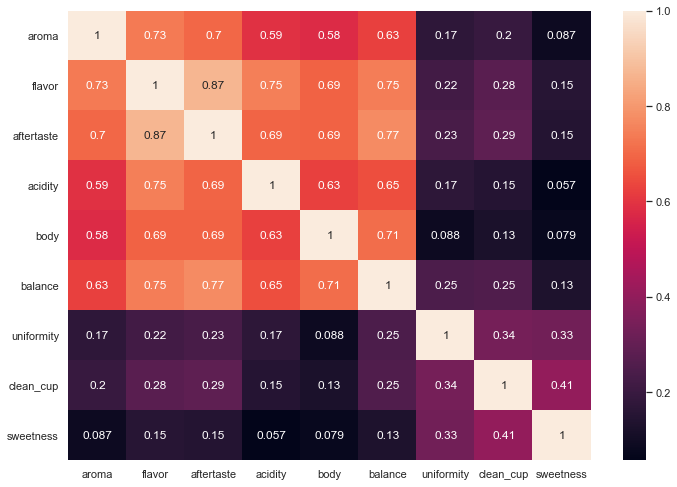

In [58]:
corr = df[df['processing_method']=='Washed / Wet'][['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness']].corr()
sns.heatmap(corr, annot=True)
plt.show()

##### Dry process

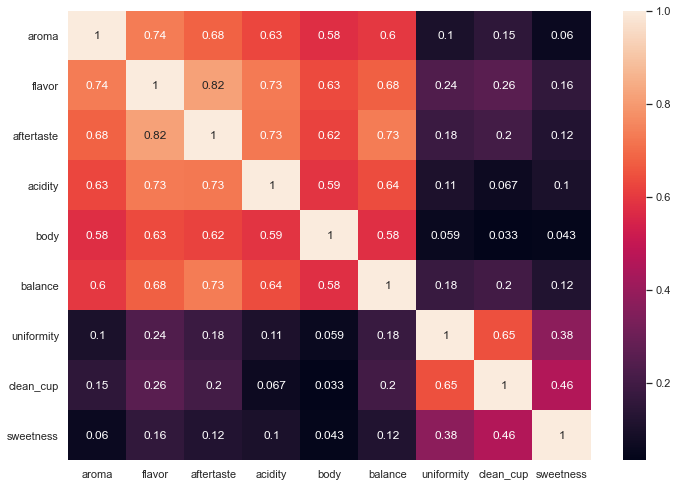

In [59]:
corr = df[df['processing_method']=='Natural / Dry'][['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness']].corr()
sns.heatmap(corr, annot=True)
plt.show()

Dry processed beans have stronger correlation between uniformity and clean cup comparing to wet processed beans.

#### Origins

##### Mexico

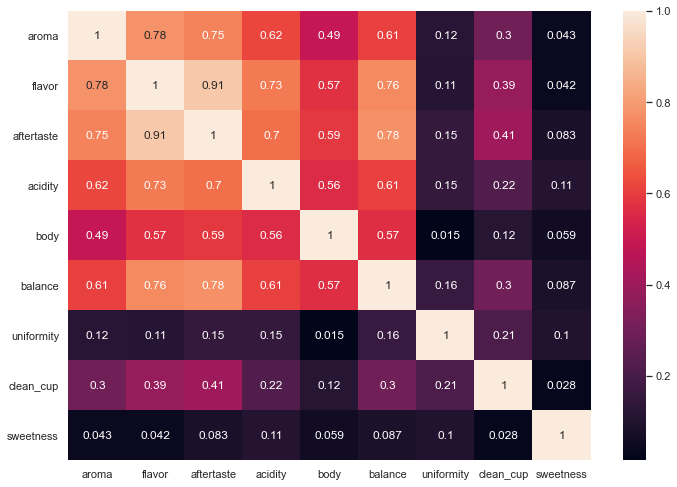

In [60]:
corr = df[df['country_of_origin']=='Mexico'][['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness']].corr()
sns.heatmap(corr, annot=True)
plt.show()

##### Guatemala

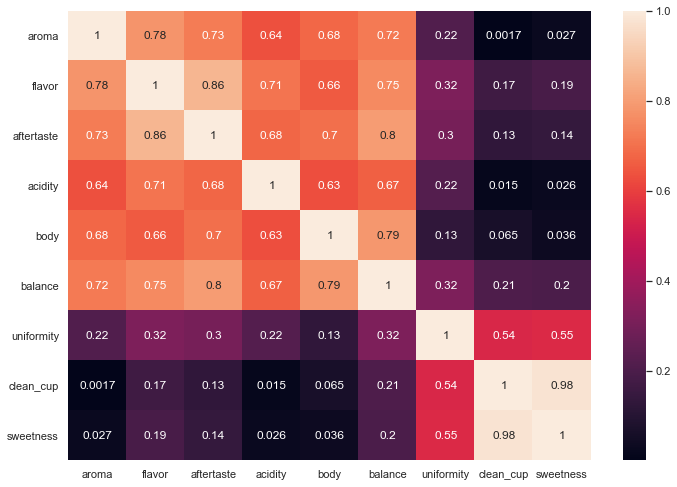

In [61]:
corr = df[df['country_of_origin']=='Guatemala'][['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness']].corr()
sns.heatmap(corr, annot=True)
plt.show()

##### Colombia

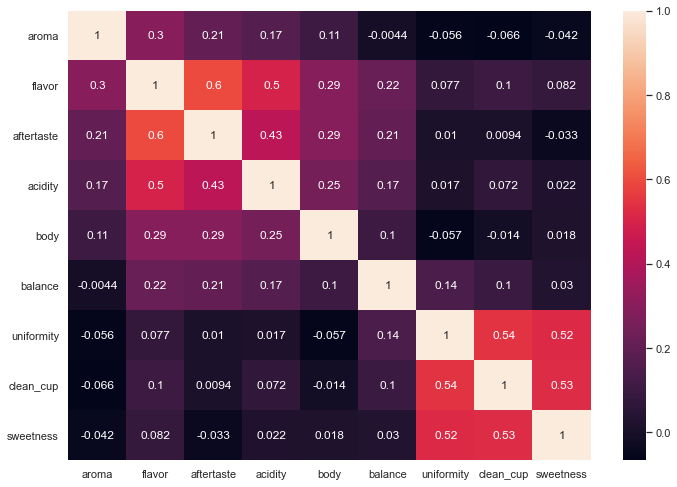

In [62]:
corr = df[df['country_of_origin']=='Colombia'][['aroma', 'flavor', 'aftertaste', 'acidity','body','balance','uniformity','clean_cup','sweetness']].corr()
sns.heatmap(corr, annot=True)
plt.show()

For Guatemalan beans, sweetness and clean cup have strong correlation(0.98).

For Mexican beans, sweetness and uniformity have weak to no correlation with other characteristics.

For Colombian beans, there are weaker correlations among characteristics.